# KEVIN ANDRES VIVEROS CARACAS
# EL trabajo se realiza con Regresión Lineal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

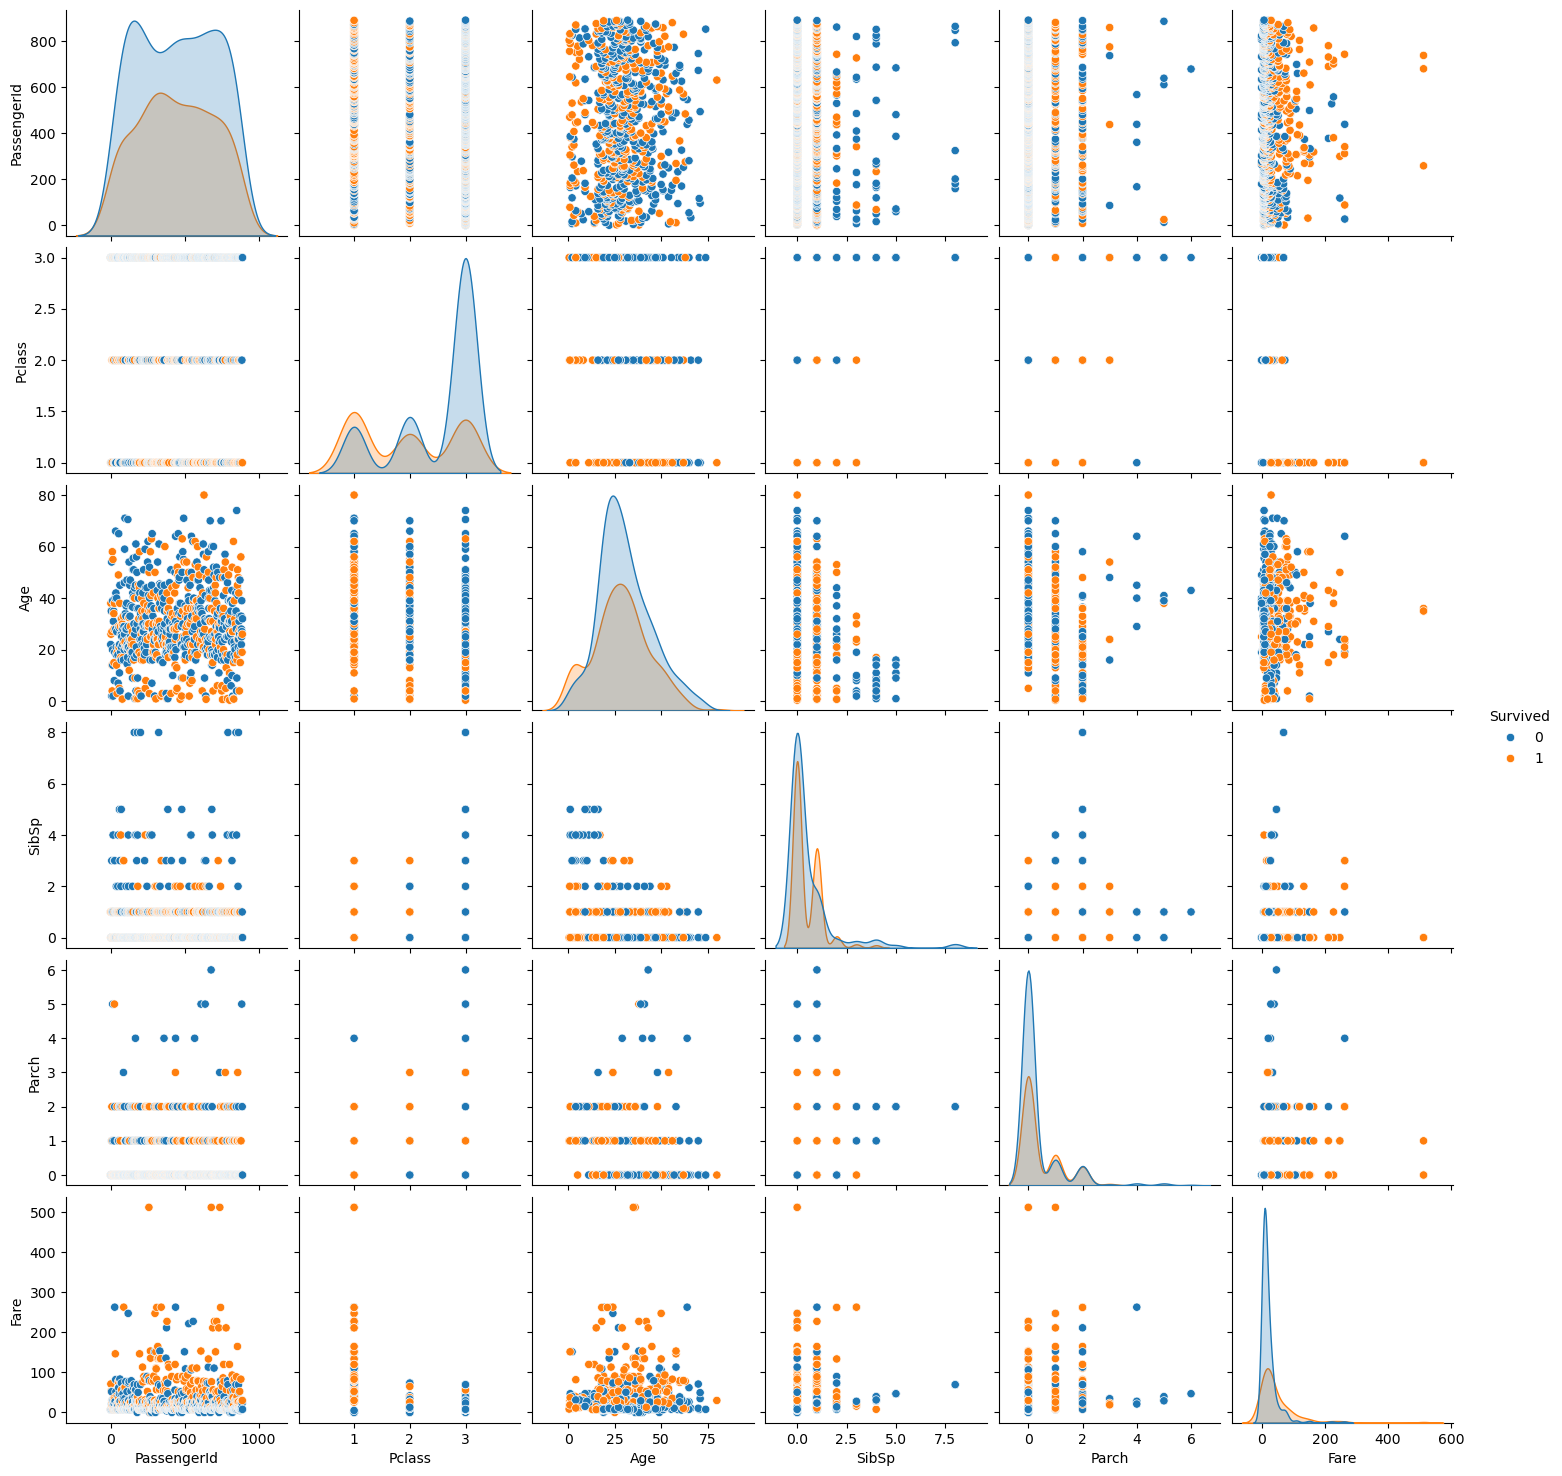

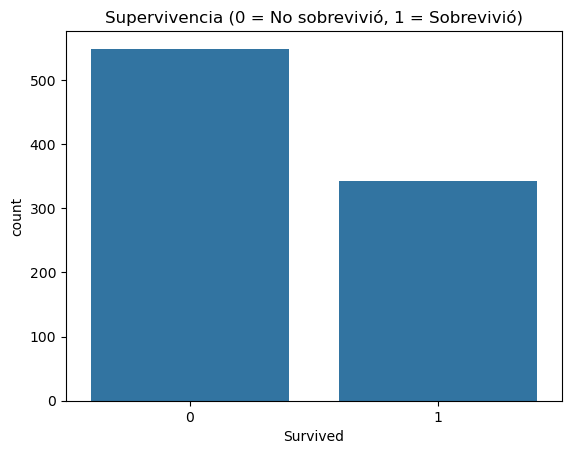

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
file_path = r'C:\Users\KEVIN VIVER\Pictures\archive\titanic-dataset.csv'
df = pd.read_csv(file_path)

# Verificar información general
print(df.info())
print(df.describe())

# Visualizar relaciones entre variables
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.show()

# Distribución de sobrevivientes
sns.countplot(data=df, x='Survived')
plt.title('Supervivencia (0 = No sobrevivió, 1 = Sobrevivió)')
plt.show()


In [4]:
# Eliminar columnas irrelevantes (si existieran)
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')

# Llenar valores faltantes
df['Age'] = df['Age'].fillna(df['Age'].median())  # Llenar con la mediana
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Llenar con la moda

# Confirmar cambios
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None


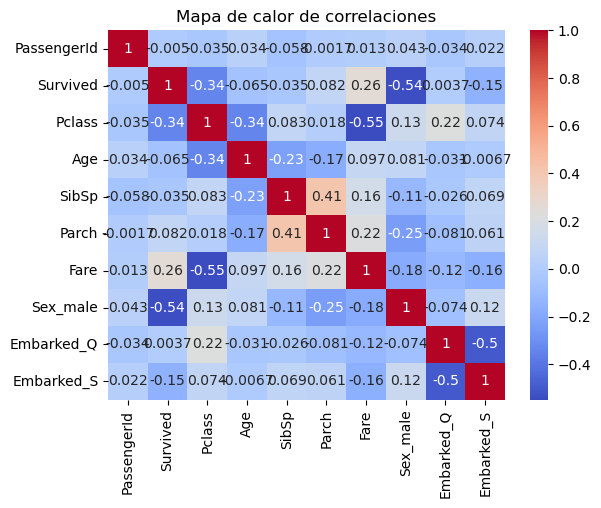

In [9]:
# Seleccionar características relevantes
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

# Mostrar correlación de variables
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño de Train: {X_train.shape}, Test: {X_test.shape}")


Tamaño de Train: (712, 5), Test: (179, 5)


In [11]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes del modelo
print("Coeficientes del modelo:", model.coef_)
print("Intercepto:", model.intercept_)


Coeficientes del modelo: [-0.19102497 -0.00649103 -0.04455793  0.04802101  0.00078265]
Intercepto: 0.9920113851439354


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 0.1869278524055185
R² Score: 0.2291691996235239


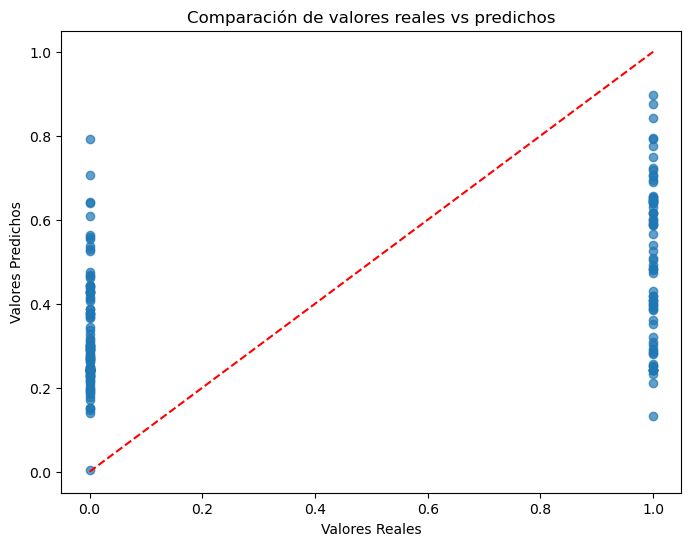

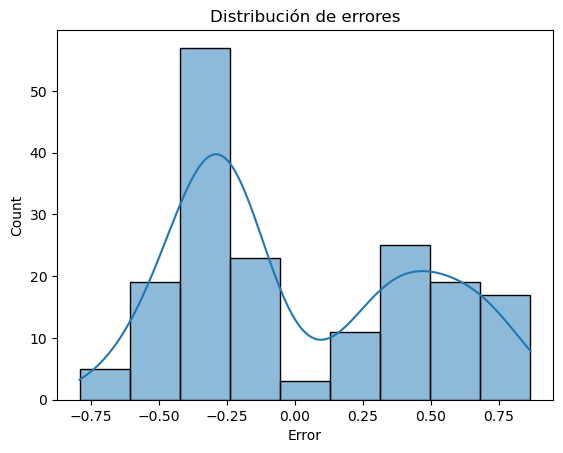

In [13]:
# Comparación de valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de valores reales vs predichos')
plt.show()

# Distribución de errores
errors = y_test - y_pred
sns.histplot(errors, kde=True)
plt.title('Distribución de errores')
plt.xlabel('Error')
plt.show()


#Interpretación y documentación
Analizar los resultados obtenidos.

Mean Squared Error (MSE): Representa el promedio de los errores cuadrados. Un valor más bajo indica un mejor desempeño.
R² Score: Muestra qué tan bien el modelo explica la variabilidad de los datos. Un valor cercano a 1 indica un buen ajuste.
Gráficas:
La comparación de valores reales vs predichos debería acercarse a la línea diagonal para un buen modelo.
La distribución de errores debería ser cercana a una distribución normal centrada en cero.